In [1]:
#importando as bibliotecas

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt 
import pandas_datareader as pdr 
from scipy.stats import norm 
from tabulate import tabulate 



In [2]:
#escolhendo o ativo
ativos = ["MGLU3.SA"]

#escolhendo o período 
anos = 3
dias = 365 * anos

data_final = dt.date.today() # dia de hoje
data_inicial = data_final - dt.timedelta(days=dias) # dia de hoje - quantidade de dias da variavel 'dias'

df = pd.concat([pdr.get_data_yahoo(ativos,
                                   start=data_inicial,
                                   end=data_final)['Close']], axis=1)



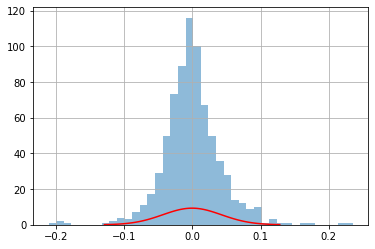

,Confidence Level,Value at Risk
0,90%,-0.055274
1,95%,-0.070835
2,99%,-0.100024
3,1%,0.099255
4,5%,0.070066
5,10%,0.054506


In [3]:
# Calcula o retorno
df['simple_return'] = (df / df.shift(1)) - 1

# Apaga o NaN
returns = df['simple_return'].dropna()

# Calcula média e desvio padrão dos retornos
mean = np.mean(returns)
std_dev = np.std(returns)

# Monta o histograma
returns.hist(bins=40, histtype='stepfilled', alpha=0.5)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
plt.plot(x, norm.pdf(x, mean, std_dev), "r")
plt.show()

VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)
VaR_01 = norm.ppf(1-0.01, mean, std_dev)
VaR_05 = norm.ppf(1-0.05, mean, std_dev)
VaR_10 = norm.ppf(1-0.1, mean, std_dev)

#cria o dataframe
df = pd.DataFrame(data = [['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99], ['1%', VaR_01], ['5%', VaR_05], ['10%', VaR_10]], columns = ['Confidence Level', 'Value at Risk'])

display(df)